In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import imageio
from pathlib import Path
from graph.load import load_graph
from eval.eval import model_struc_to_eval, get_real_feat, get_sim_feat, get_struc_df, get_cf_veh_pair, raw_struc_to_eval, compare_struc,model_feat_to_eval,model_struc_to_eval
import pandas as pd
import os
#import cv2
import pickle
import torch
from matplotlib.pyplot import figure
import math
import numpy as np
plt.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler
import re

In [4]:
exp_dir = Path().resolve().parent / "experiment"
exp_setting = exp_dir / "bologna_clean"
#exp_setting = exp_dir / "traci_tls"
real_data_dir = exp_setting / "data" / "test1" / "test_data"
out_dir = exp_setting / "data" / "test1" / "out1" 

In [5]:
real_struc, real_feat, node_id_dict, scalers =  load_graph(real_data_dir)

In [7]:
with open(out_dir / "predicted_graph_2_4_50.p", "rb") as g:
    model_graph = pickle.load(g)

In [11]:
sim_struc, sim_feat = model_graph[list(model_graph.keys())[0]]

In [46]:
sim_feat['veh'][10]['length']

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        0.7852, 0.7880, 0.8099, 0.8140, 0.7988, 0.8277, 0.7884, 0.8087, 0.7371,
        0.8140])

In [29]:
# with open(out_dir / "predicted_graph_2_4_50.p", "rb") as g:
#     model_graph = pickle.load(g)
# for key in model_graph.keys():
#     feat_dict = model_graph[key][1]
#     for type in feat_dict.keys():
#         feat_type_dict = feat_dict[type]
#         for ids in feat_type_dict.keys():
#             feat_type_id_dict = feat_type_dict[ids]
#             time = feat_type_id_dict['time'].tolist()
#             time_lst = [item for sublist in time for item in sublist]
#             feat_type_id_dict['time'] = torch.tensor([sum(time_lst[:i+1]) for i in range(len(time))])
#             #print(feat_type_id_dict['time'])

In [30]:
for node_type in sim_feat.keys():
    feat_type = sim_feat[node_type]
    for node_id in feat_type.keys():
        feat_type_id = feat_type[node_id]
        for feat_name in feat_type_id.keys():
            feat_type_id[feat_name] = feat_type_id[feat_name].squeeze()

In [38]:
node_type = "lane"
node_id = 1
feat_name = "speed"
real_feat[node_type][node_id]['time']

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

In [39]:
node_type =  "lane"
node_id = 1
feat_name = "speed"
sim_feat[node_type][node_id]['time']

tensor([2.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        0.9926, 0.9947, 0.9933, 0.9890, 0.9880, 0.9922, 0.9922, 0.9933, 0.9932,
        0.9951])

In [40]:
# getkey(1)

In [38]:
# real_feat['veh'][0]['coor_x']

### 1.Graph Features

In [16]:
def get_struc_df(real_struc):
    front_veh = real_struc[('veh', 'phy/ahead', 'veh')][0].tolist()
    behind_veh = real_struc[('veh', 'phy/ahead', 'veh')][1].tolist()
    time = real_struc[('veh', 'phy/ahead', 'veh')][2].tolist()
    g_struc = pd.DataFrame(np.array([front_veh, behind_veh,time]).T)
    g_struc.columns = ['front_veh', 'behind_veh', 'time']
    return g_struc
def get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id):
    veh_pair = g_struc[(g_struc['front_veh'] == front_veh_id) & (g_struc['behind_veh'] == behind_veh_id)]
    return veh_pair

def get_real_feat(real_feat, node_type, node_id, feat):
    feat_lst = real_feat[node_type][node_id][feat].tolist()
    time_lst = real_feat[node_type][node_id]['time'].tolist() 
    #print(feat_lst)
    g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
    g_feat.columns = [feat+str(node_id), 'time']
    g_feat['time'] = [int(i) for i in g_feat.time]
    return g_feat

def get_sim_feat(model_graph, node_type, node_id, feat):
    node_name = node_type+'/'+ str(node_id)
    g_feat = pd.DataFrame()
    for keys in model_graph:
        name = keys.split('@')[0]
        if node_name == name:
            feat_dict = model_graph[keys][1]
            feat_lst = feat_dict[node_type][node_id][feat].tolist()
            time_lst = feat_dict[node_type][node_id]['time'].tolist() 
            
            feat_lst = [item for sublist in feat_lst for item in sublist]
            #time_lst = [item for sublist in time_lst for item in sublist]
            #print(len(feat_lst), len(time_lst))
            #print(feat_lst, time_lst)

            g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
            g_feat.columns = [feat+str(node_id), 'time']
            g_feat['time'] = [int(i) for i in g_feat.time]
    if not g_feat.empty:
        return g_feat
    else:
        print("g_feat is empty")


def feat_plot(node_type, node_id, feat_name):
    feat_real = get_real_feat(real_feat, node_type, node_id, feat_name)
    feat_sim = get_sim_feat(model_graph, node_type, node_id, feat_name)
    plt.plot(feat_real['time'], feat_real[feat_name+str(node_id)], label = "real")
    plt.plot(feat_sim['time'], feat_sim[feat_name+str(node_id)], linestyle='--',  marker='o',
        markersize=2, label = "sim")
    
    plt.xlabel("Time step")
    plt.ylabel(feat_name)
    plt.title(feat_name + "_of_" + node_type + str(node_id))
    plt.legend()

def plot_avg_feat(real_feat, model_graph, node_type, feat_name):
    feat_lst_real = []
    feat_lst_sim = []
    avg_feat_real = pd.DataFrame()
    avg_feat_sim = pd.DataFrame()
    for node_id in list(real_feat[node_type].keys()):
        df_real = get_real_feat(real_feat, node_type, node_id, feat_name) 
        df_sim = get_sim_feat(model_graph, node_type, node_id, feat_name)
        
        feat_lst_real.append(df_real[feat_name+str(node_id)])
        feat_lst_sim.append(df_sim[feat_name+str(node_id)])
    
    df_feat_real = pd.DataFrame(np.array(feat_lst_real))
    df_feat_sim = pd.DataFrame(np.array(feat_lst_sim))
    
    feat_real_avg = df_feat_real.mean()
    feat_sim_avg = df_feat_sim.mean()
    
    time_real =  df_real['time']
    time_sim =  df_sim['time']
    
    avg_feat_real['time'] = time_real
    avg_feat_sim['time'] = time_sim
    avg_feat_real[feat_name+'_avg'] = feat_real_avg
    avg_feat_sim[feat_name+'_avg'] = feat_sim_avg
    
    plt.plot(avg_feat_real['time'], avg_feat_real[feat_name+'_avg'], label = "real")
    plt.plot(avg_feat_sim['time'], avg_feat_sim[feat_name+'_avg'], label = "sim")

    plt.xlabel("Time step")
    plt.ylabel(feat_name)
    plt.title("Citywide_avg_"+ node_type + "_" + feat_name)
    plt.legend()
    plt.show()
    # return avg_feat_real, avg_feat_sim
    
def CF_plot(front_veh_id,behind_veh_id,feat_name,plot_cf):
    g_struc = get_struc_df(real_struc)
    veh_pair = get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id)

    feat_front = get_real_feat(real_feat, 'veh', front_veh_id, feat_name)
    feat_behind = get_real_feat(real_feat, 'veh', behind_veh_id, feat_name)
    feat_front_sim = get_sim_feat(model_graph, 'veh', front_veh_id, feat_name)
    feat_behind_sim = get_sim_feat(model_graph, 'veh', behind_veh_id,feat_name)

    merge_front = pd.merge(veh_pair, feat_front, on='time')
    merge_behind = pd.merge(merge_front, feat_behind, on='time')
    merge_front_sim = pd.merge(veh_pair, feat_front_sim, on='time')
    merge_behind_sim = pd.merge(merge_front_sim, feat_behind_sim, on='time')

    if plot_cf == 1:
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(front_veh_id)], label = "Front_car")
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(behind_veh_id)], label = "Follower_car")
        plt.plot(merge_behind_sim['time'], merge_behind_sim[feat_name+str(front_veh_id)], linestyle='--',  marker='o',
            markerfacecolor='blue', markersize=2, label = "Front_car_sim")
        plt.plot(merge_behind_sim['time'],merge_behind_sim[feat_name+str(behind_veh_id)], linestyle='--',  marker='o',
            markerfacecolor='blue', markersize=2, label = "Follower_car_sim")
        plt.xlabel("Time step")
        plt.ylabel(feat_name)
        plt.title(feat_name + " of vehicle pairs")
        plt.legend()
        plt.show()
    else:
        return merge_behind_sim

In [26]:
get_feat_df(real_feat, 'veh', 0, 'speed')

,speed0,time
0,0.000000,1
1,0.081622,2
2,0.155827,3
3,0.263880,4
4,0.346676,5
...,...,...
105,0.710571,106
106,0.717931,107
107,0.723976,108
108,0.736770,109


In [46]:
def get_struc_df(struc_dict):
    front_veh = struc_dict[('veh', 'phy/ahead', 'veh')][0].tolist()
    behind_veh = struc_dict[('veh', 'phy/ahead', 'veh')][1].tolist()
    time = struc_dict[('veh', 'phy/ahead', 'veh')][2].tolist()
    g_struc = pd.DataFrame(np.array([front_veh, behind_veh,time]).T)
    g_struc.columns = ['front_veh', 'behind_veh', 'time']
    return g_struc
def get_feat_df(feat_dict, node_type, node_id, feat):
    feat_lst = feat_dict[node_type][node_id][feat].tolist()
    time_lst = feat_dict[node_type][node_id]['time'].tolist() 
    #print(feat_lst)
    g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
    g_feat.columns = [feat+str(node_id), 'time']
    g_feat['time'] = [int(i) for i in g_feat.time]
    return g_feat

In [20]:
def get_struc_df(struc_dict):
    front_veh = struc_dict[('veh', 'phy/ahead', 'veh')][0].tolist()
    behind_veh = struc_dict[('veh', 'phy/ahead', 'veh')][1].tolist()
    time = struc_dict[('veh', 'phy/ahead', 'veh')][2].tolist()
    g_struc = pd.DataFrame(np.array([front_veh, behind_veh,time]).T)
    g_struc.columns = ['front_veh', 'behind_veh', 'time']
    return g_struc

def get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id):
    veh_pair = g_struc[(g_struc['front_veh'] == front_veh_id) & (g_struc['behind_veh'] == behind_veh_id)]
    return veh_pair

def get_feat_df(feat_dict, node_type, node_id, feat):
    feat_lst = feat_dict[node_type][node_id][feat].tolist()
    time_lst = feat_dict[node_type][node_id]['time'].tolist() 
    #print(feat_lst)
    g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
    g_feat.columns = [feat+str(node_id), 'time']
    g_feat['time'] = [int(i) for i in g_feat.time]
    return g_feat

# def get_sim_feat(model_graph, node_type, node_id, feat):
#     node_name = node_type+'/'+ str(node_id)
#     g_feat = pd.DataFrame()
#     for keys in model_graph:
#         name = keys.split('@')[0]
#         if node_name == name:
#             feat_dict = model_graph[keys][1]
#             feat_lst = feat_dict[node_type][node_id][feat].tolist()
#             time_lst = feat_dict[node_type][node_id]['time'].tolist() 
            
#             feat_lst = [item for sublist in feat_lst for item in sublist]
#             #time_lst = [item for sublist in time_lst for item in sublist]
#             #print(len(feat_lst), len(time_lst))
#             #print(feat_lst, time_lst)

#             g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
#             g_feat.columns = [feat+str(node_id), 'time']
#             g_feat['time'] = [int(i) for i in g_feat.time]
#     if not g_feat.empty:
#         return g_feat
#     else:
#         print("g_feat is empty")


def feat_plot(real_feat_dict, sim_feat_dict, node_type, node_id, feat_name):
    real_feat = get_feat_df(real_feat_dict, node_type, node_id, feat_name)
    sim_feat = get_feat_df(sim_feat_dict, node_type, node_id, feat_name)
    plt.plot(real_feat['time'], real_feat[feat_name+str(node_id)], label = "real")
    plt.plot(sim_feat['time'], sim_feat[feat_name+str(node_id)], linestyle='--',  marker='o',
        markersize=2, label = "sim")
    
    plt.xlabel("Time step")
    plt.ylabel(feat_name)
    plt.title(feat_name + "_of_" + node_type + str(node_id))
    plt.legend()

def plot_avg_feat(real_feat_dict, sim_feat_dict, node_type, feat_name):
    feat_lst_real = []
    feat_lst_sim = []
    avg_feat_real = pd.DataFrame()
    avg_feat_sim = pd.DataFrame()
    for node_id in list(real_feat_dict[node_type].keys()):
        df_real = get_feat_df(real_feat_dict, node_type, node_id, feat_name) 
        df_sim = get_feat_df(sim_feat_dict, node_type, node_id, feat_name)
        
        feat_lst_real.append(df_real[feat_name+str(node_id)])
        feat_lst_sim.append(df_sim[feat_name+str(node_id)])
    
    df_feat_real = pd.DataFrame(np.array(feat_lst_real))
    df_feat_sim = pd.DataFrame(np.array(feat_lst_sim))
    
    feat_real_avg = df_feat_real.mean()
    feat_sim_avg = df_feat_sim.mean()
    
    time_real =  df_real['time']
    time_sim =  df_sim['time']
    
    avg_feat_real['time'] = time_real
    avg_feat_sim['time'] = time_sim
    avg_feat_real[feat_name+'_avg'] = feat_real_avg
    avg_feat_sim[feat_name+'_avg'] = feat_sim_avg
    
    plt.plot(avg_feat_real['time'], avg_feat_real[feat_name+'_avg'], label = "real")
    plt.plot(avg_feat_sim['time'], avg_feat_sim[feat_name+'_avg'], label = "sim")

    plt.xlabel("Time step")
    plt.ylabel(feat_name)
    plt.title("Citywide_avg_"+ node_type + "_" + feat_name)
    plt.legend()
    plt.show()
    # return avg_feat_real, avg_feat_sim
    
def CF_plot(real_feat_dict,sim_feat_dict,front_veh_id,behind_veh_id,feat_name,plot_cf):
    g_struc = get_struc_df(real_struc)
    veh_pair = get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id)

    feat_front = get_feat_df(real_feat_dict, 'veh', front_veh_id, feat_name)
    feat_behind = get_feat_df(real_feat_dict, 'veh', behind_veh_id, feat_name)
    feat_front_sim = get_feat_df(sim_feat_dict, 'veh', front_veh_id, feat_name)
    feat_behind_sim = get_feat_df(sim_feat_dict, 'veh', behind_veh_id,feat_name)

    merge_front = pd.merge(veh_pair, feat_front, on='time')
    merge_behind = pd.merge(merge_front, feat_behind, on='time')
    merge_front_sim = pd.merge(veh_pair, feat_front_sim, on='time')
    merge_behind_sim = pd.merge(merge_front_sim, feat_behind_sim, on='time')

    if plot_cf == 1:
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(front_veh_id)], label = "Front_car")
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(behind_veh_id)], label = "Follower_car")
        plt.plot(merge_behind_sim['time'], merge_behind_sim[feat_name+str(front_veh_id)], linestyle='--',  marker='o',
            markerfacecolor='blue', markersize=2, label = "Front_car_sim")
        plt.plot(merge_behind_sim['time'],merge_behind_sim[feat_name+str(behind_veh_id)], linestyle='--',  marker='o',
            markerfacecolor='blue', markersize=2, label = "Follower_car_sim")
        plt.xlabel("Time step")
        plt.ylabel(feat_name)
        plt.title(feat_name + " of vehicle pairs")
        plt.legend()
        plt.show()
    else:
        return merge_behind_sim

In [21]:
g_struc = get_struc_df(real_struc)
df = g_struc[['front_veh','behind_veh']].drop_duplicates()
all_veh_pairs = list(set([(i,j) for i in df['front_veh'] for j in df['behind_veh']]))
all_pairs = []
for pair in all_veh_pairs:
    front_veh_id, behind_veh_id = pair
    veh_pair = get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id)
    
    pair_time = len(set(veh_pair.time))
    if pair_time>10: 
        # print(min(veh_pair['time']))
        if max(veh_pair['time'])>100:
            all_pairs.append((front_veh_id, behind_veh_id, pair_time))

In [18]:
all_pairs

[(216, 234, 30),
 (276, 285, 18),
 (63, 73, 89),
 (108, 117, 55),
 (174, 179, 53),
 (290, 301, 12),
 (71, 81, 86),
 (78, 97, 80),
 (277, 283, 13),
 (194, 219, 28),
 (112, 163, 32),
 (218, 215, 23),
 (60, 87, 27),
 (100, 104, 77),
 (210, 224, 38),
 (24, 32, 14),
 (268, 286, 16),
 (220, 229, 18),
 (70, 98, 22),
 (265, 273, 21),
 (34, 45, 22),
 (258, 265, 24),
 (127, 136, 68),
 (157, 167, 51),
 (211, 216, 26),
 (206, 222, 13),
 (53, 88, 11),
 (269, 284, 18),
 (235, 245, 31),
 (253, 263, 17),
 (116, 126, 54),
 (38, 56, 88),
 (146, 130, 19),
 (159, 205, 19),
 (164, 175, 51),
 (131, 174, 26),
 (263, 268, 15),
 (117, 150, 20),
 (128, 161, 12),
 (158, 165, 50),
 (163, 135, 27),
 (212, 241, 31),
 (149, 160, 48),
 (259, 274, 13),
 (135, 185, 15),
 (17, 115, 39),
 (140, 147, 20),
 (257, 277, 12),
 (282, 287, 15),
 (61, 78, 84),
 (172, 206, 20),
 (279, 290, 15),
 (221, 230, 36),
 (179, 197, 11),
 (207, 231, 36),
 (90, 158, 38),
 (247, 256, 27),
 (142, 169, 50),
 (156, 177, 13),
 (46, 65, 27),
 (25

In [23]:
node_type = "lane"
node_id = 0
feat_name1 = "occupancy"
feat_name2 = "vehicles"

feat_lst_real1 = []
feat_lst_real2 = []
feat_lst_sim1 = []
feat_lst_sim2 = []
avg_feat_real = pd.DataFrame()
avg_feat_sim = pd.DataFrame()
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1 = get_feat_df(real_feat, node_type, node_id, feat_name1) 
    df_sim_feat1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
    df_real_feat2 = get_real_feat(real_feat, node_type, node_id, feat_name2) 
    df_sim_feat2 = get_sim_feat(sim_feat, node_type, node_id, feat_name2)
    
    feat_lst_real1.append(df_real_feat1[feat_name1+str(node_id)])
    feat_lst_real2.append(df_real_feat2[feat_name2+str(node_id)])
    feat_lst_sim1.append(df_sim_feat1[feat_name1+str(node_id)])
    feat_lst_sim2.append(df_sim_feat2[feat_name2+str(node_id)])

df_feat1_real = pd.DataFrame(np.array(feat_lst_real1))
df_feat1_sim = pd.DataFrame(np.array(feat_lst_sim1))
df_feat2_real = pd.DataFrame(np.array(feat_lst_real2))
df_feat2_sim = pd.DataFrame(np.array(feat_lst_sim2))

feat_real_avg1 = df_feat1_real.mean()
feat_real_avg2 = df_feat2_real.mean()
feat_sim_avg1 = df_feat1_sim.mean()
feat_sim_avg2 = df_feat2_sim.mean()

# time_real =  df_real['time']
# time_sim =  df_sim['time']

# avg_feat_real['time'] = time_real
# avg_feat_sim['time'] = time_sim
# avg_feat_real[feat_name+'_avg'] = feat_real_avg
# avg_feat_sim[feat_name+'_avg'] = feat_sim_avg

plt.plot(feat_real_avg2, feat_real_avg1, label = "real")
plt.plot(feat_sim_avg2, feat_sim_avg1, label = "sim")

# plt.xlabel("Time step")
# plt.ylabel(feat_name)
plt.title("Citywide_avg_"+ node_type + "_" + feat_name)
plt.legend()
plt.show()

g_feat is empty


/tmp/ipykernel_97344/540885644.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)


TypeError: 'NoneType' object is not subscriptable

In [26]:
df_feat1_real

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039695,0.039695,0.039695,0.039695
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066173,0.041517,0.039695,0.026581,0.037850,0.039695,0.039695,0.039695,0.039695,0.039695
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.034122,0.090222,0.090222,0.090222,0.090222,0.035611,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147672,0.147672,0.280577,0.143247,0.265810,0.201552,0.280577,0.157417,0.147672,0.000000
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
real_feat["lane"].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [34]:
df_feat1_real

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039695,0.039695,0.039695,0.039695
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066173,0.041517,0.039695,0.026581,0.037850,0.039695,0.039695,0.039695,0.039695,0.039695
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.034122,0.090222,0.090222,0.090222,0.090222,0.035611,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147672,0.147672,0.280577,0.143247,0.265810,0.201552,0.280577,0.157417,0.147672,0.000000
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
df_feat2_real

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.045455,0.045455
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045455,0.045455,0.045455,0.000000,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.045455,0.045455,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045455,0.045455,0.090909,0.045455,0.090909,0.045455,0.090909,0.045455,0.045455,0.000000
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
node_type = "lane"
node_id = 0
feat_name1 = "occupancy"
feat_name2 = "vehicles"

feat_lst_real1 = []
feat_lst_real2 = []
feat_lst_sim1 = []
feat_lst_sim2 = []
avg_feat_real = pd.DataFrame()
avg_feat_sim = pd.DataFrame()
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1 = get_feat_df(real_feat, node_type, node_id, feat_name1) 
    df_sim_feat1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
    df_real_feat2 = get_feat_df(real_feat, node_type, node_id, feat_name2) 
    df_sim_feat2 = get_feat_df(sim_feat, node_type, node_id, feat_name2)
    
    feat_lst_real1.append(df_real_feat1[feat_name1+str(node_id)])
    feat_lst_real2.append(df_real_feat2[feat_name2+str(node_id)])
    feat_lst_sim1.append(df_sim_feat1[feat_name1+str(node_id)])
    feat_lst_sim2.append(df_sim_feat2[feat_name2+str(node_id)])

df_feat1_real = pd.DataFrame(np.array(feat_lst_real1))
df_feat1_sim = pd.DataFrame(np.array(feat_lst_sim1))
df_feat2_real = pd.DataFrame(np.array(feat_lst_real2))
df_feat2_sim = pd.DataFrame(np.array(feat_lst_sim2))

# df_feat1_real
df_real = pd.merge(df_feat1_real,df_feat2_real,on="time")
df_sim = pd.merge(df_feat1_sim,df_feat2_sim,on="time")

# feat_real_avg1 = df_feat1_real.mean()
# feat_real_avg2 = df_feat2_real.mean()
# feat_sim_avg1 = df_feat1_sim.mean()
# feat_sim_avg2 = df_feat2_sim.mean()

# time_real =  df_real['time']
# time_sim =  df_sim['time']

# avg_feat_real['time'] = time_real
# avg_feat_sim['time'] = time_sim
# avg_feat_real[feat_name+'_avg'] = feat_real_avg
# avg_feat_sim[feat_name+'_avg'] = feat_sim_avg

# plt.plot(df_real[feat_name], feat_real_avg1, label = "real")
# plt.plot(feat_sim_avg2, feat_sim_avg1, label = "sim")

# # plt.xlabel("Time step")
# # plt.ylabel(feat_name)
# plt.title("Citywide_avg_"+ node_type + "_" + feat_name)
# plt.legend()
# plt.show()

/tmp/ipykernel_97344/540885644.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
/tmp/ipykernel_97344/540885644.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
/tmp/ipykernel_97344/540885644.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object'

KeyError: 'time'

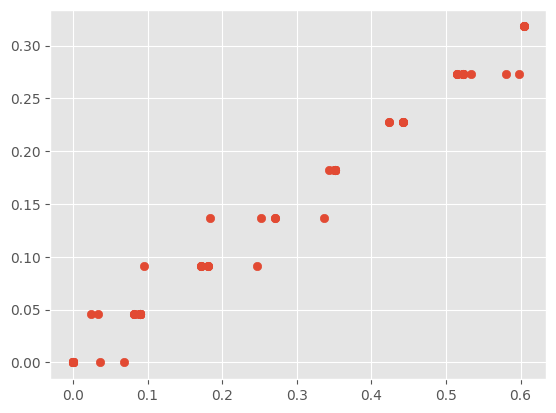

In [22]:
feat_real1
df = pd.merge(feat_real1,feat_real2,on="time")
plt.scatter(df['occupancy3'], df['vehicles3'])

In [27]:
node_type = "lane"
node_id = 3
feat_name1 = "occupancy"
get_feat_df(real_feat, node_type, node_id, feat_name1)

,occupancy3,time
0,0.000000,1
1,0.000000,2
2,0.000000,3
3,0.000000,4
4,0.000000,5
...,...,...
105,0.090222,106
106,0.090222,107
107,0.035611,108
108,0.000000,109


/tmp/ipykernel_97344/540885644.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
/tmp/ipykernel_97344/540885644.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)


ValueError: setting an array element with a sequence.

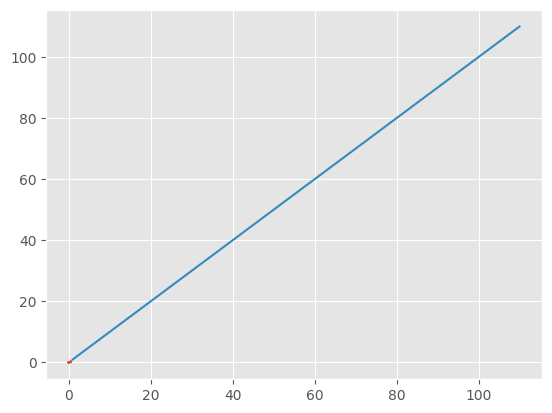

In [36]:
node_type = "lane"
node_id = 3
feat_name1 = "occupancy"
feat_name2 = "vehicles"

feat_real1 = get_feat_df(real_feat, node_type, node_id, feat_name1)
feat_real2 = get_feat_df(real_feat, node_type, node_id, feat_name2)

feat_sim1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
feat_sim2 = get_feat_df(sim_feat, node_type, node_id, feat_name2)
plt.plot(feat_real1, feat_real2, label = "real")
plt.plot(feat_sim1, feat_sim2, linestyle='--',  marker='o',
    markersize=2, label = "sim")

plt.xlabel("Number of vehicles")
plt.ylabel("Occupancy of lane")
#plt.title( + "_of_" + node_type + str(node_id))
plt.legend()

In [52]:
node_type = "lane"
node_id = 3
feat_name = "occupancy"
get_feat_df(sim_feat, node_type, node_id, feat_name)

/tmp/ipykernel_97344/880384000.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)


,occupancy3,time
0,[0.0],2
1,[0.0],3
2,[0.0],4
3,[0.0],5
4,[0.0],6
...,...,...
105,[0.012201406992971897],106
106,[0.0183266568928957],107
107,[0.010490012355148792],108
108,[0.017530659213662148],109


In [47]:
def feat_plot(real_feat_dict, sim_feat_dict, node_type, node_id, feat_name):
    real_feat_df = get_feat_df(real_feat_dict, node_type, node_id, feat_name)
    sim_feat_df = get_feat_df(sim_feat_dict, node_type, node_id, feat_name)
    plt.plot(real_feat_df['time'], real_feat_df[feat_name+str(node_id)], label = "real")
    plt.plot(sim_feat_df['time'], sim_feat_df[feat_name+str(node_id)], linestyle='--',  marker='o',
        markersize=2, label = "sim")
    
    plt.xlabel("Time step")
    plt.ylabel(feat_name)
    plt.title(feat_name + "_of_" + node_type + str(node_id))
    plt.legend()

/tmp/ipykernel_97344/880384000.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)


ValueError: setting an array element with a sequence.

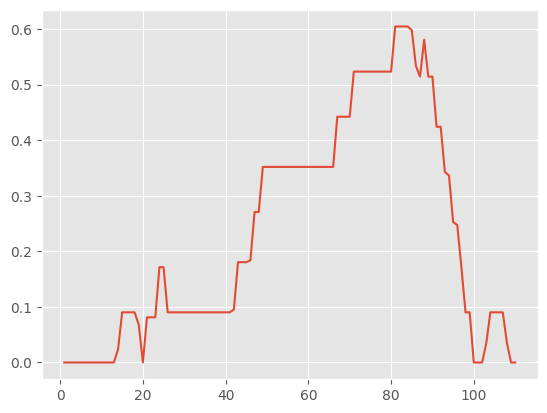

In [48]:
node_type = "lane"
node_id = 3
feat_name = "occupancy"
feat_plot(real_feat,sim_feat,node_type,node_id,feat_name,)

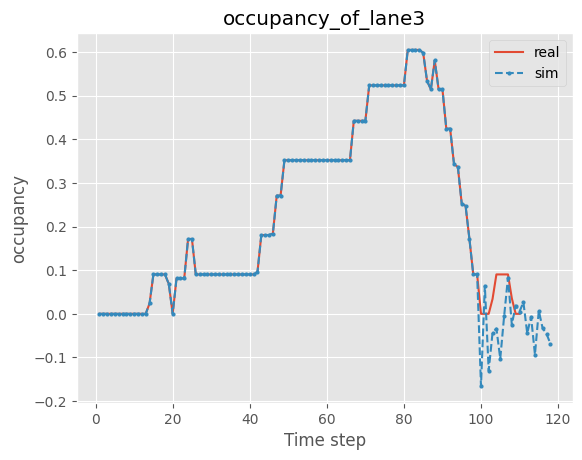

In [13]:
node_type = "lane"
node_id = 3
feat_name = "occupancy"
feat_plot(node_type,node_id,feat_name,)

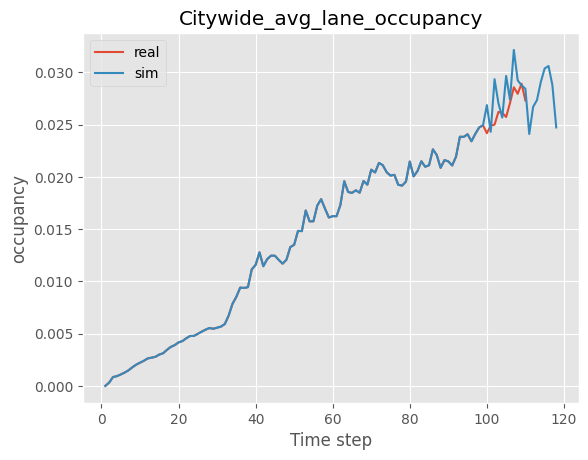

In [18]:
node_type = "lane"
feat_name = "occupancy"

plot_avg_feat(real_feat, model_graph, node_type, feat_name)

In [31]:

# def coord_plot(front_veh_id,behind_veh_id):
#     coor_x_front = get_real_feat(real_feat, 'veh', front_veh_id, "coor_x")
#     coor_y_front = get_real_feat(real_feat, 'veh', front_veh_id, "coor_y")
#     coor_x_behind = get_real_feat(real_feat, 'veh', behind_veh_id, "coor_x")
#     coor_y_behind = get_real_feat(real_feat, 'veh', behind_veh_id, "coor_y")
    
#     coor_x_front_sim = get_sim_feat(model_graph, 'veh', front_veh_id, "coor_x")
#     coor_y_front_sim = get_sim_feat(model_graph, 'veh', front_veh_id, "coor_y")
#     coor_x_behind_sim = get_sim_feat(model_graph, 'veh', behind_veh_id, "coor_x")
#     coor_y_behind_sim = get_sim_feat(model_graph, 'veh', behind_veh_id, "coor_y")
    
#     plt.scatter(coor_x_front["coor_x"+str(front_veh_id)], coor_y_front["coor_y"+str(front_veh_id)], s=20, label = "Front_car")
#     plt.scatter(coor_x_behind["coor_x"+str(behind_veh_id)], coor_y_behind["coor_y"+str(behind_veh_id)], s=20, label = "Behind_car")
#     plt.scatter(coor_x_front_sim["coor_x"+str(front_veh_id)], coor_y_front_sim["coor_y"+str(front_veh_id)], s=20, label = "Front_car_sim")
#     plt.scatter(coor_x_behind_sim["coor_x"+str(behind_veh_id)], coor_y_behind_sim["coor_y"+str(behind_veh_id)], s=20, label = "Behind_car_sim")
#     plt.legend()

# front_veh_id = 78
# behind_veh_id = 97
# coord_plot(front_veh_id,behind_veh_id)
    

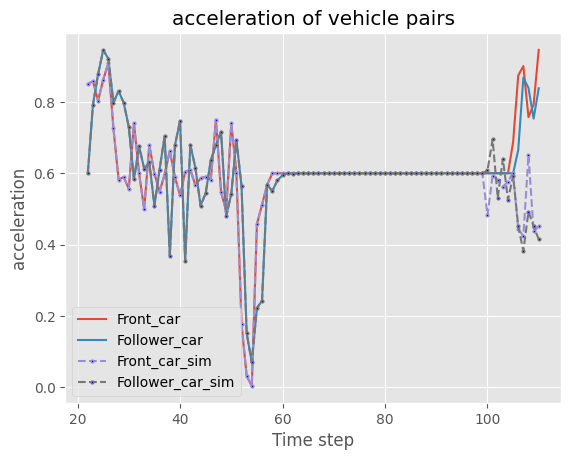

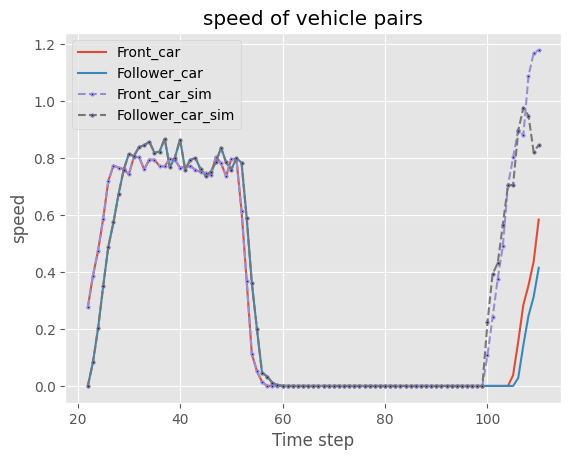

In [37]:
front_veh_id = 63
behind_veh_id = 73
CF_plot(front_veh_id,behind_veh_id,"acceleration",1)
CF_plot(front_veh_id,behind_veh_id,"speed",1)

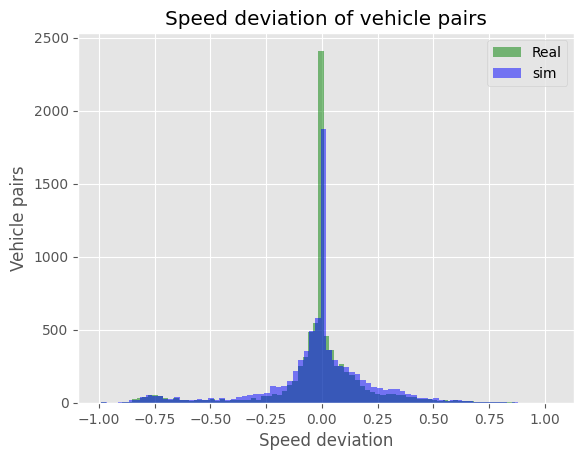

In [ ]:

g_struc = get_struc_df(real_struc)
npairs = list(set(zip(g_struc['front_veh'], g_struc['behind_veh'])))

speed_dev = []
speed_dev_sim = []

for pair in all_pairs:
    front_veh_id = pair[0]
    behind_veh_id = pair[1] 
    veh_pair = get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id)
    speed_front = get_real_feat(real_feat, 'veh', front_veh_id, 'speed')
    speed_behind = get_real_feat(real_feat, 'veh', behind_veh_id, 'speed')
    
    speed_front_sim = get_sim_feat(model_graph, 'veh', front_veh_id, 'speed')
    speed_behind_sim = get_sim_feat(model_graph, 'veh', behind_veh_id,'speed')    
    
    merge_front = pd.merge(veh_pair, speed_front, on='time')
    merge_behind = pd.merge(merge_front, speed_behind, on='time')
    merge_front_sim = pd.merge(veh_pair, speed_front_sim, on='time')
    merge_behind_sim = pd.merge(merge_front_sim, speed_behind_sim, on='time')

    speed_dev.extend(merge_behind['speed'+str(front_veh_id)] - merge_behind['speed'+str(behind_veh_id)])
    speed_dev_sim.extend(merge_behind_sim['speed'+str(front_veh_id)] - merge_behind_sim['speed'+str(behind_veh_id)])
    

kwargs = dict(alpha=0.5, bins=80)

plt.hist(speed_dev, **kwargs, color='g', label='Real')
plt.hist(speed_dev_sim, **kwargs, color='b', label='sim')
plt.xlabel("Speed deviation")
plt.ylabel("Vehicle pairs")
plt.title("Speed deviation of vehicle pairs")

plt.legend()
plt.show()

In [32]:

# front_veh_id = 0
# behind_veh_id = 2
# g_struc = get_struc_df(real_struc)
# veh_pair = get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id)
# coord_front = get_real_feat(real_feat, 'veh', front_veh_id, 'coordinate')
# coord_behind = get_real_feat(real_feat, 'veh', behind_veh_id, 'coordinate')
# coord_front_sim = get_sim_feat(model_graph, 'veh', front_veh_id, 'coordinate')
# coord_behind_sim = get_sim_feat(model_graph, 'veh', behind_veh_id,'coordinate')      

# merge_front = pd.merge(veh_pair, coord_front, on='time')
# merge_behind = pd.merge(merge_front, coord_behind, on='time')
# merge_front_sim = pd.merge(veh_pair, coord_front_sim, on='time')
# merge_behind_sim = pd.merge(merge_front_sim, coord_behind_sim, on='time')


# step = 40
# xs = [x[0] for x in merge_behind['coordinate'+str(front_veh_id)]][20:step]
# ys = [x[1] for x in merge_behind['coordinate'+str(front_veh_id)]][20:step]
# xe = [x[0] for x in merge_behind['coordinate'+str(behind_veh_id)]][20:step]
# ye = [x[1] for x in merge_behind['coordinate'+str(behind_veh_id)]][20:step]

# step = 40
# xs_sim = [x[0] for x in merge_behind_sim['coordinate'+str(front_veh_id)]][20:step]
# ys_sim = [x[1] for x in merge_behind_sim['coordinate'+str(front_veh_id)]][20:step]
# xe_sim = [x[0] for x in merge_behind_sim['coordinate'+str(behind_veh_id)]][20:step]
# ye_sim = [x[1] for x in merge_behind_sim['coordinate'+str(behind_veh_id)]][20:step]


# figure(figsize=(16, 3), dpi=80)
# plt.scatter(xs, ys, s=20, label = "Front_car")
# plt.scatter(xe, ye, s=20, label = "Follower_car")
# plt.legend()
# plt.close

In [33]:
# xs = [x[0] for x in merge_behind['coordinate'+str(front_veh_id)]][20:step]
# xsdis = [max(xs) - i for i in xs]
# xe = [x[0] for x in merge_behind['coordinate'+str(behind_veh_id)]][20:step]
# xedis = [max(xe) - i for i in xe]

# xs_sim = [x[0] for x in merge_behind_sim['coordinate'+str(front_veh_id)]][20:step]
# xsdis_sim = [max(xs_sim) - i for i in xs_sim]
# xe_sim = [x[0] for x in merge_behind_sim['coordinate'+str(behind_veh_id)]][20:step]
# xedis_sim = [max(xe_sim) - i for i in xe_sim]
# #plt.ylim([0, 1500])
# plt.plot(xsdis, label = "Front_car")
# plt.plot(xedis, label = "Follower_car")
# plt.plot(xsdis_sim, linestyle='--',  marker='o',
#      markerfacecolor='blue', markersize=2,  label = "Sim_Front_car")
# plt.plot(xedis_sim, linestyle='--',  marker='o',
#      markerfacecolor='blue', markersize=2, label = "Sim_Follower_car")
# plt.xlabel("Time step")
# plt.ylabel("Postion")
# plt.title("Position of vehicle pairs")
# plt.title("Position of vehicle pairs")
# plt.legend()

#### 2. Graph Structure

In [13]:
real_struc, real_feat, node_id_dict, scalers =  load_graph(real_data_dir)
real_struc = raw_struc_to_eval(real_struc)
sim_struc = model_struc_to_eval(model_graph)

t = 100

sub_real = real_struc[real_struc["step"] == t]
sub_sim = sim_struc[sim_struc["step"] == t]
real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')

In [36]:
# ntype = {}
# nsize = {}
# nsize_map = {'lane': 100, 'veh': 50, 'road': 200,'tlc': 50}
# for node in list(real_G.nodes):
#     node_type = ''.join([i for i in node if not i.isdigit()])
#     ntype.update({node:node_type})
#     nsize.update({node:nsize_map[node_type]})
# #print(ntype)
# nx.set_node_attributes(real_G, ntype, 'ntype')
# nx.set_node_attributes(real_G, nsize, 'nsize')

In [14]:
lane_nodes = [i for i in list(real_G.nodes) if 'lane' in i]
veh_nodes = [i for i in list(real_G.nodes) if 'veh' in i]
road_nodes = [i for i in list(real_G.nodes) if 'road' in i]
tlc_nodes = [i for i in list(real_G.nodes) if 'tlc' in i]

In [ ]:


for t in range(950,1000):

    sub_real = real_struc[real_struc["step"] == t]
    sub_sim = sim_struc[sim_struc["step"] == t]
    real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
    sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')


    lane_nodes = [i for i in list(real_G.nodes) if 'lane' in i]
    veh_nodes = [i for i in list(real_G.nodes) if 'veh' in i]
    road_nodes = [i for i in list(real_G.nodes) if 'road' in i]
    tlc_nodes = [i for i in list(real_G.nodes) if 'tlc' in i]
    
    lane_nodes1 = [i for i in list(sim_G.nodes) if 'lane' in i]
    veh_nodes1 = [i for i in list(sim_G.nodes) if 'veh' in i]
    road_nodes1 = [i for i in list(sim_G.nodes) if 'road' in i]
    tlc_nodes1 = [i for i in list(sim_G.nodes) if 'tlc' in i]


    fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
    plt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')

    pos = nx.fruchterman_reingold_layout(real_G)
    #pos = nx.spring_layout(real_G)
    #pos = nx.circular_layout(real_G)
    nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 200,label='road_nodes')
    nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 100,label='lane_nodes')
    nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 30, label='veh_nodes')
    nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 100, label='tlc_nodes')

    nx.draw_networkx_edges(real_G, ax=axs[0], pos=pos)
    #nx.draw_networkx(real_G, ax=axs[0],  nodelist=rednodes, pos=pos, node_color = node_color, with_labels=False)
    axs[0].title.set_text('Real system structure')
    axs[0].legend(loc="upper left")


    nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 200,label='road_nodes')
    nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 100,label='lane_nodes')
    nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 30, label='veh_nodes')
    nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 100, label='tlc_nodes')

    nx.draw_networkx_edges(sim_G, ax=axs[1], pos=pos)

    axs[1].title.set_text('Simulated system structure')
    axs[1].legend(loc="upper left")

    #plt.show()
    
    plt.savefig(out_dir / "step_{s}.png".format(s=t), format="PNG",)
plt.close()

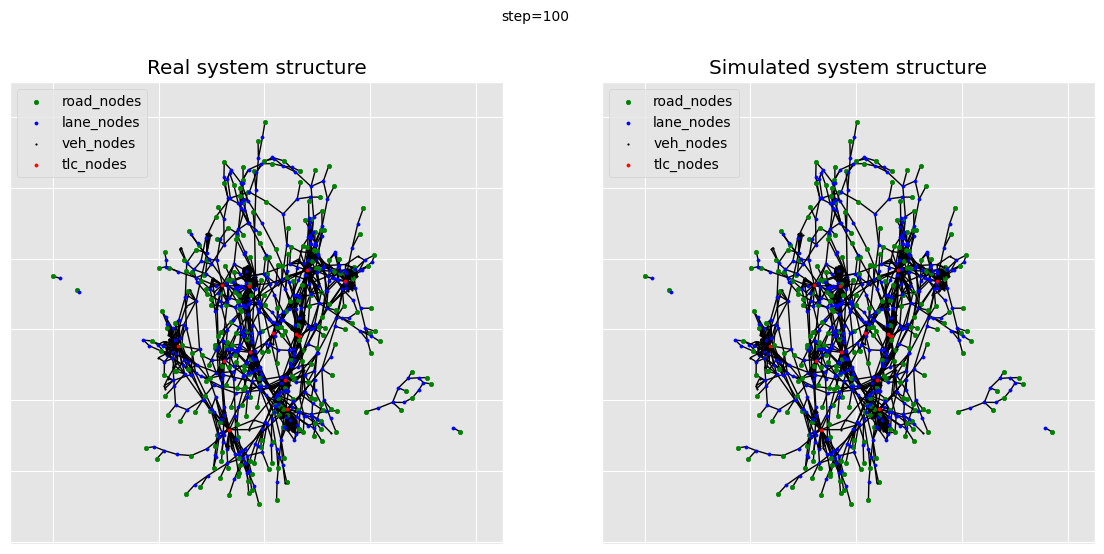

In [22]:

sub_real = real_struc[real_struc["step"] == t]
sub_sim = sim_struc[sim_struc["step"] == t]
real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')


lane_nodes = [i for i in list(real_G.nodes) if 'lane' in i]
veh_nodes = [i for i in list(real_G.nodes) if 'veh' in i]
road_nodes = [i for i in list(real_G.nodes) if 'road' in i]
tlc_nodes = [i for i in list(real_G.nodes) if 'tlc' in i]

lane_nodes1 = [i for i in list(sim_G.nodes) if 'lane' in i]
veh_nodes1 = [i for i in list(sim_G.nodes) if 'veh' in i]
road_nodes1 = [i for i in list(sim_G.nodes) if 'road' in i]
tlc_nodes1 = [i for i in list(sim_G.nodes) if 'tlc' in i]


fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
plt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')

pos = nx.fruchterman_reingold_layout(real_G)
#pos = nx.spring_layout(real_G)
#pos = nx.circular_layout(real_G)
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 10,label='road_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 5,label='lane_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 1, label='veh_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 5, label='tlc_nodes')

nx.draw_networkx_edges(real_G, ax=axs[0], pos=pos)
#nx.draw_networkx(real_G, ax=axs[0],  nodelist=rednodes, pos=pos, node_color = node_color, with_labels=False)
axs[0].title.set_text('Real system structure')
axs[0].legend(loc="upper left")


nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 10,label='road_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 5,label='lane_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 1, label='veh_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 5, label='tlc_nodes')

nx.draw_networkx_edges(sim_G, ax=axs[1], pos=pos)

axs[1].title.set_text('Simulated system structure')
axs[1].legend(loc="upper left")

plt.show()

#plt.savefig(out_dir / "step_{s}.png".format(s=t), format="PNG",)
#plt.close()

In [67]:
frames = []
for t in range(950,1000):
    image = imageio.v2.imread(out_dir / "step_{s}.png".format(s=t))
    frames.append(image)
imageio.mimsave(out_dir /'test.gif', 
            frames,          
            fps = 2) 

In [15]:
root = "veh1"

sub_real = real_struc[(real_struc["step"] == t) & (real_struc["from"]== root)]
real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
print(list(real_G.nodes))

sub_sim = sim_struc[(sim_struc["step"] == t) & (sim_struc["from"]== root)]
sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')


#### start to plot###

viewer = [root]
neighbor = list(real_G.nodes)
neighbor.remove(root)

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

pos = nx.spring_layout(real_G)
plt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')

nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=viewer, pos=pos, node_color = 'red', node_size = 200,  label='viewer')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=viewer, pos=pos, node_color = 'red', node_size = 200,label='viewer')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=neighbor, pos=pos, node_color = 'blue', node_size = 200,label='neighbor')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=neighbor, pos=pos, node_color = 'blue', node_size = 200,label='neighbor')

nx.draw_networkx_edges(real_G, ax=axs[0], pos=pos)
nx.draw_networkx_edges(sim_G, ax=axs[1], pos=pos)
nx.draw_networkx_labels(real_G, ax=axs[0], pos=pos)
nx.draw_networkx_labels(sim_G, ax=axs[1], pos=pos)
#nx.draw_networkx(real_G, ax=axs[0], pos=pos, with_labels=True)
#nx.draw_networkx(sim_G, ax=axs[1], pos=pos, with_labels=True)
axs[0].legend()
axs[1].legend()
axs[0].title.set_text('Neighbors of Veh1 (Real)')
axs[1].title.set_text('Neighbors of Veh1 (Sim)')

[]


ValueError: list.remove(x): x not in list

In [19]:
import osmnx as ox

In [ ]:
G=ox.graph_from_point((41, 100),custom_filter=road_filter,dist=100,simplify=False,retain_all=True,truncate_by_edge=True)

In [39]:
# netfile = '/home/PJLAB/wangding/Desktop/wangding/tsim/experiment/traci_tls/cross.net.xml'
# G = ox.graph.graph_from_xml(netfile)

In [40]:
# fig, ax = ox.plot_graph(graph)

In [5]:

real_struc, real_feat, node_id_dict, scalers =  load_graph(real_data_dir)
real_struc = raw_struc_to_eval(real_struc)
sim_struc = model_struc_to_eval(model_graph)
compare_struc("veh1", real_struc, sim_struc, out_dir, get_gif = 0)
#save_fig("veh1", real_struc, sim_struc, out_dir)
#get_gif(out_dir)
#get_video(out_dir)
print("Done")

============= Save fig has finished! ========
Done


In [9]:
import networkx as nx
import nx_altair as nxa

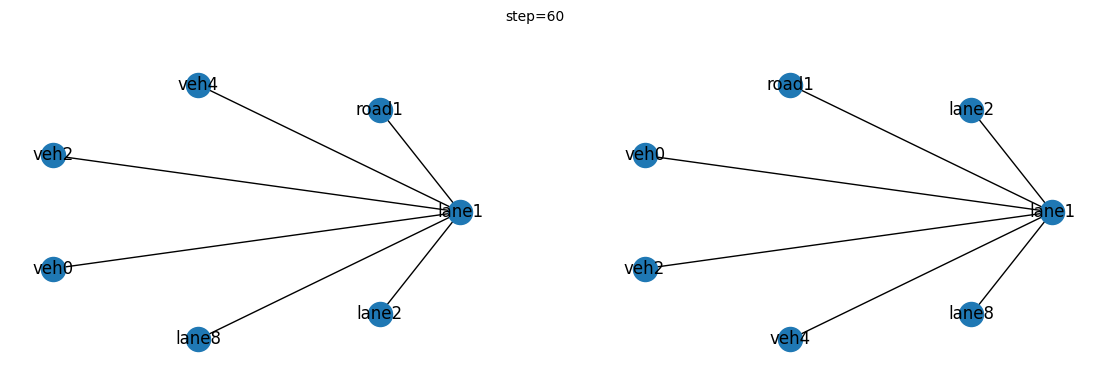

In [14]:
t = 60
root = "lane1"
sub_real = real_struc[(real_struc["step"] == t) & (real_struc["from"]== root)]
real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')

sub_sim = sim_struc[(sim_struc["step"] == t) & (sim_struc["from"]== root)]
sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')

fig, axs = plt.subplots(ncols=2, figsize=(14, 4))
plt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')
nx.draw_circular(real_G, ax=axs[0], with_labels=True)
nx.draw_circular(sim_G, ax=axs[1], with_labels=True)

plt.savefig(out_dir / "step_{s}.png".format(s=t), format="PNG",)